# IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFECV

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_text

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# DATA IMPORT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("*************")

# DATA CLEANING

In [ ]:
data.head()

,BH No.,Elevation,Depth,Description,RQD,Jn,Jr,Ja,Jw,SRF,Rock Class,Q Value
0,BH01,192.28,0.0,FILL,0,20.0,0.0,0.0,0,0.0,V,0.1
1,BH01,191.28,1.0,FILL,0,20.0,0.0,0.0,0,0.0,V,0.1
2,BH01,190.28,2.0,FILL,0,20.0,0.0,0.0,0,0.0,V,0.1
3,BH01,189.28,3.0,FILL,0,20.0,0.0,0.0,0,0.0,V,0.1
4,BH01,188.28,4.0,FILL,0,20.0,0.0,0.0,0,0.0,V,0.1


In [ ]:
data.duplicated().sum()

0

In [ ]:
data['Description'].unique()

array(['FILL', 'Granite', 'Fill'], dtype=object)

In [ ]:
data['Rock Class'].value_counts()

Rock Class
I      714
V      669
III    568
II     559
IV     531
Name: count, dtype: int64

In [ ]:
data['BH No.']

0        BH01
1        BH01
2        BH01
3        BH01
4        BH01
        ...  
3036    FBH21
3037    FBH21
3038    FBH21
3039    FBH21
3040    FBH21
Name: BH No., Length: 3041, dtype: object

In [ ]:
data.describe()

,Elevation,Depth,RQD,Jn,Jr,Ja,Jw,SRF,Q Value
count,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000
mean,175.745890,31.069582,50.752055,8.731174,1.829990,1.964896,0.786912,1.512496,69.321506
std,20.764685,24.010640,36.913907,6.733505,1.188293,1.842811,0.409557,1.163667,138.161240
min,116.410000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,161.940000,12.000000,20.000000,4.000000,1.500000,1.000000,1.000000,1.000000,0.280000
50%,176.400000,25.000000,48.000000,9.000000,1.500000,1.000000,1.000000,1.000000,1.670000
75%,188.670000,46.000000,89.000000,12.000000,3.000000,4.000000,1.000000,2.500000,34.500000
max,224.800000,97.000000,100.000000,20.000000,4.000000,10.000000,1.000000,7.500000,533.330000


In [ ]:
def encoding(df : pd.core.frame.DataFrame, col_name : str):
  ordinal_mapping = {}
  values = df[col_name].unique()
  encodings = list(range(1,len(values)+1))
  for x in range(len(encodings)):
    ordinal_mapping[values[x]] = encodings[x]
  return ordinal_mapping

In [ ]:
data['Description'].unique()

array(['FILL', 'Granite', 'Fill'], dtype=object)

In [ ]:
data.replace({"FILL" : "Fill"}, inplace = True)
encoding_BH = encoding(data, "BH No.")
encoding_desc = encoding(data, 'Description')
data.replace(encoding_BH, inplace = True)
data.replace(encoding_desc, inplace = True)
data.replace({"I" : 1, "II" : 2, "III" : 3, "IV" : 4, "V" : 5}, inplace = True)

In [ ]:
data['Description'].unique()

array([1, 2])

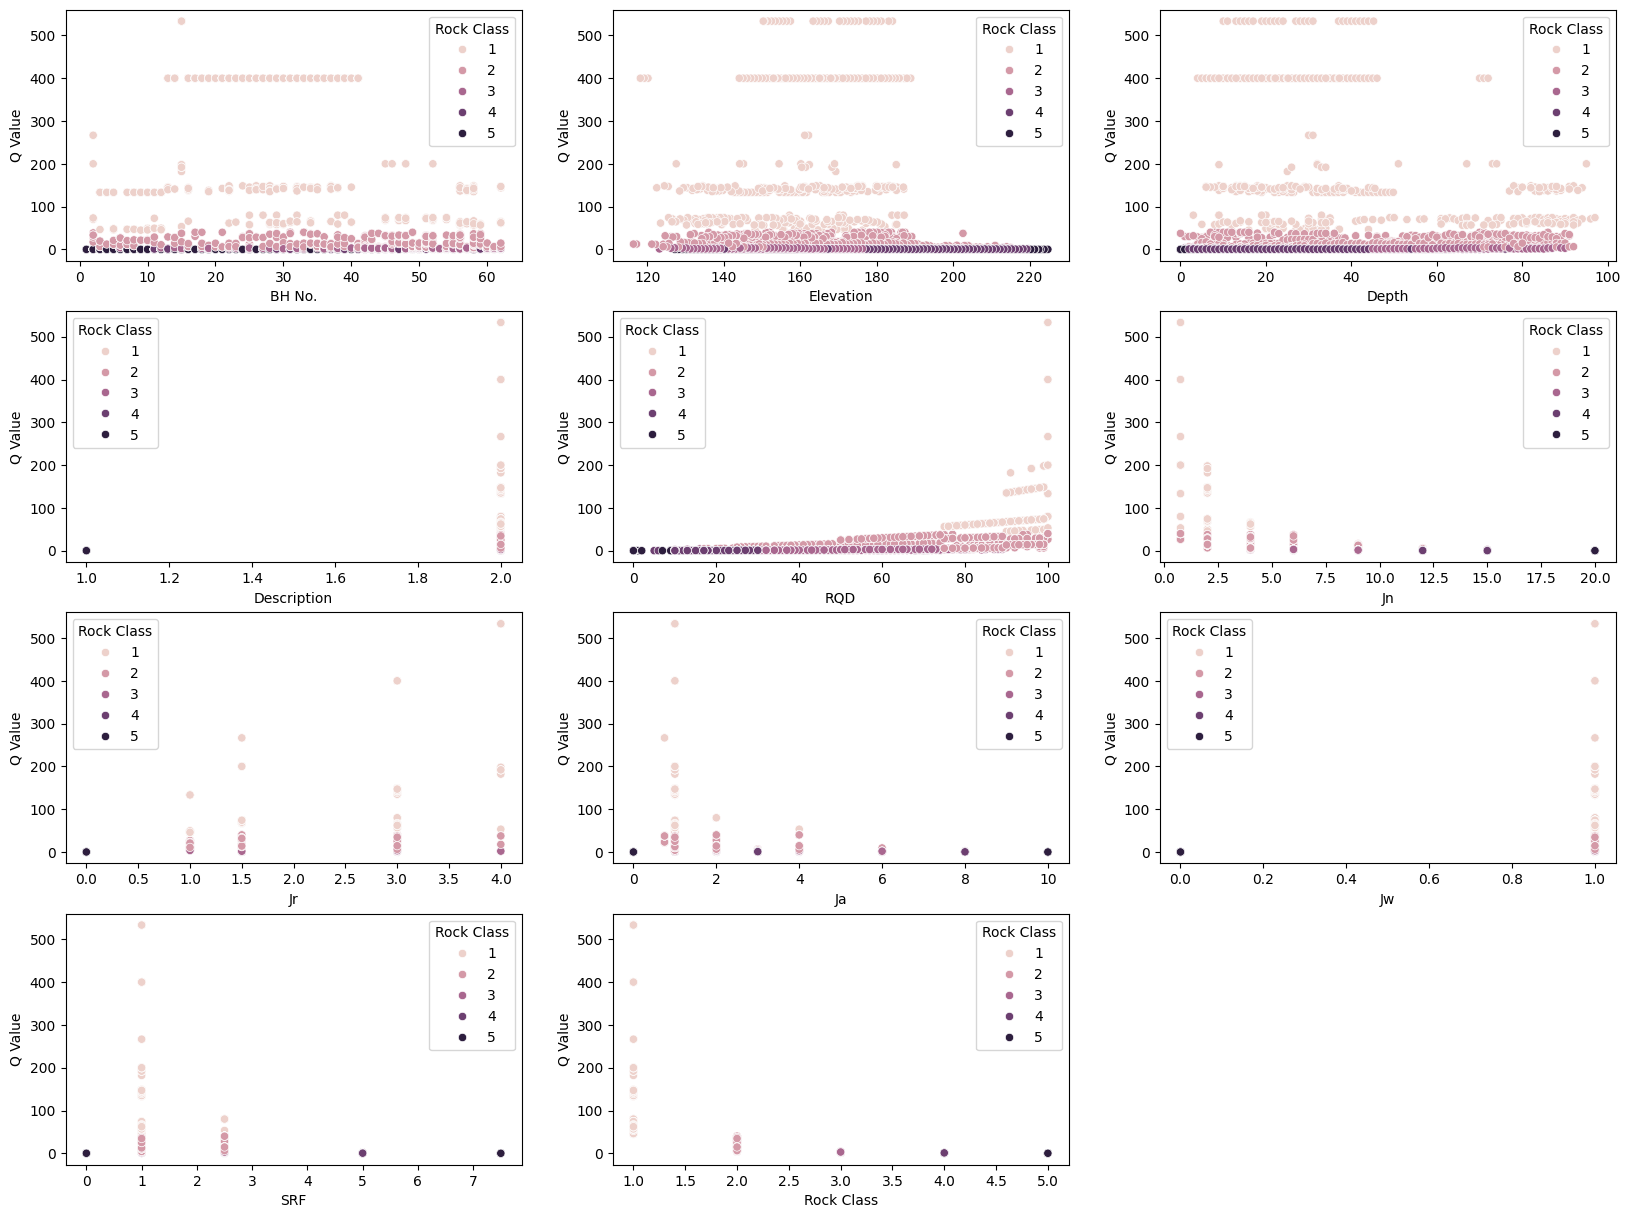

In [ ]:
count = 0
plt.figure(figsize = (20,15))
for x in data.columns:
  count += 1
  if x != 'Q Value':
    plt.subplot(4, 3, count)
    sns.scatterplot(data, x = data[x], y = data['Q Value'], hue = data['Rock Class'])
  else:
    continue

### Interpretation

The image shows scatter plots of the "Q Value" of a rock mass (Y-axis) against various features measured in a borehole dataset. The color hue indicates different rock classes (1-5), with class 1 being the best quality and class 5 being the worst quality. The features plotted on the X-axis include:

BH No. (Borehole Number):

The Q Value distribution appears to be scattered across different borehole numbers.
Higher Q Values are more frequent in higher borehole numbers, indicating variability in rock quality across different boreholes.

Elevation:

Similar to BH No., there is no clear trend between elevation and Q Value, indicating that rock quality does not consistently change with elevation.
There are some high Q Values across different elevations, suggesting local variations in rock quality.

Depth:

There is a concentration of low Q Values at greater depths.
This might indicate that deeper sections of the boreholes tend to have lower quality rocks.

Description:

There are only two distinct descriptions (1 and 2).
Q Values are scattered, indicating that rock quality (Q Value) varies within each description category.

RQD (Rock Quality Designation):

Higher RQD values are associated with higher Q Values.
This suggests that better rock quality (higher RQD) corresponds to higher Q Values.

Jn (Joint Number):

There is a concentration of low Q Values at higher Jn values.
This indicates that rocks with more joints tend to have lower Q Values.

Jr (Joint Roughness):

Higher Jr values are associated with lower Q Values.
This suggests that rougher joints correspond to poorer rock quality.

Ja (Joint Alteration):

Higher Ja values are associated with lower Q Values.
This suggests that more altered joints correspond to poorer rock quality.

Jw (Joint Water Reduction Factor):

Lower Jw values are associated with lower Q Values.
This suggests that higher water presence in joints corresponds to poorer rock quality.

SRF (Stress Reduction Factor):

Higher SRF values are associated with lower Q Values.
This indicates that higher stress reduction corresponds to poorer rock quality.

Rock Class:

The Q Value is lowest for rock class 5 and highest for rock class 1.
This aligns with the classification where rock class 1 represents the best quality and rock class 5 the worst.

---
---
Key Observations

High RQD values correlate with better rock quality (higher Q Values).
Higher Jn, Ja, Jw, and SRF values correlate with poorer rock quality (lower Q Values).

Jr shows an inverse relationship with rock quality, where rougher joints (higher Jr) correlate with lower Q Values.

Depth shows that rock quality tends to decrease with increasing depth.

Rock Class demonstrates a clear inverse relationship with Q Value, as expected.

This exploratory data analysis suggests that features like RQD, Jn, Ja, Jw, and SRF are significant indicators of rock quality and can be critical in building a classification model for predicting rock class.

In [ ]:
data.shape

(3041, 12)

#MODEL BUILDING

## Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(["Q Value", "Rock Class", "BH No."], axis  = 1)
y = data[['Rock Class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [ ]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])

In [ ]:
X_train.shape[0], X_test.shape[0]

(2584, 457)

## Baseline Model- Dummy Classifier

In [ ]:
from sklearn.dummy import DummyClassifier
model = DummyClassifier(strategy = 'most_frequent')
model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("The accuracy for the predicted model is: ", accuracy_score(y_test, y_pred))
print("The recall for the predicted model is: ", recall_score(y_test, y_pred, average = "weighted"))
print("The precision for the predicted model is: ", precision_score(y_test, y_pred, average = "weighted", zero_division = 0))
print("The f1_score for the predicted model is: ", f1_score(y_test, y_pred, average = "weighted"))

The accuracy for the predicted model is:  0.24288840262582057
The recall for the predicted model is:  0.24288840262582057
The precision for the predicted model is:  0.05899477613012272
The f1_score for the predicted model is:  0.09493173482910594


### INTERPRETATION OF THE OUTPUT

Accuracy Score:

Output:
0.24288840262582057
0.24288840262582057

Explanation: The model correctly predicts approximately 24.29% of the instances. This indicates that the dummy classifier's performance is low, which is expected as it serves as a baseline.

---
Recall Score (Weighted):

Output:
0.24288840262582057
0.24288840262582057

Explanation: The recall score for the model is also approximately 24.29%. This suggests that the model is capturing about 24.29% of the actual positive instances across all classes, weighted by the number of true instances for each class.

---
Precision Score (Weighted):

Output:
0.05899477613012272
0.05899477613012272

Explanation: The precision score is approximately 5.90%, indicating that when the model predicts a positive instance, it is correct only 5.90% of the time. This low precision suggests that the model makes many false positive predictions.

---
F1 Score (Weighted):

Output:
0.09493173482910594
0.09493173482910594

Explanation: The F1 score is approximately 9.49%, which is the harmonic mean of precision and recall. The low F1 score indicates that the model has poor performance in balancing precision and recall.

---
---
Interpretation:

The dummy classifier is a simple baseline that typically uses strategies like predicting the most frequent class or making random predictions.
The low values across all metrics (accuracy, precision, recall, F1 score) indicate that the dummy classifier does not perform well, as expected.
These metrics provide a baseline to compare more sophisticated models against. The goal is for other models to significantly outperform this dummy classifier.

In a balanced dataset, you expect the baseline model to perform poorly, providing a reference point to measure the improvement of more advanced models.

This baseline helps establish how well a naive approach would perform and sets the stage for building more complex and accurate models.


## Preprocessing & Logistic Regression

In [ ]:
X.columns

Index(['Elevation', 'Depth', 'Description', 'RQD', 'Jn', 'Jr', 'Ja', 'Jw',
       'SRF'],
      dtype='object')

In [ ]:
ct = ColumnTransformer([("feature_scaling", StandardScaler(), [0,1,3,4,5,6,7,8])],
                       remainder = "passthrough")
X_transformed = ct.fit_transform(X_train, y_train)
log_reg = LogisticRegression(multi_class = "multinomial", max_iter = 10000)
model = log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("The accuracy for the predicted model is: ", accuracy_score(y_test, y_pred))
print("The recall for the predicted model is: ", recall_score(y_test, y_pred, average = "weighted"))
print("The precision for the predicted model is: ", precision_score(y_test, y_pred, average = "weighted", zero_division = 0))
print("The f1_score for the predicted model is: ", f1_score(y_test, y_pred, average = "weighted"))

The accuracy for the predicted model is:  0.9803063457330415
The recall for the predicted model is:  0.9803063457330415
The precision for the predicted model is:  0.9808747195523917
The f1_score for the predicted model is:  0.9803368679844604


## Evaluation

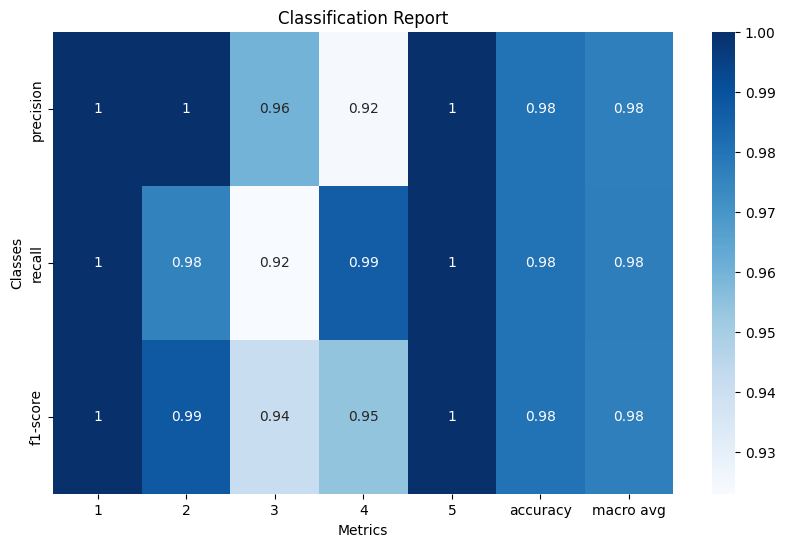

In [ ]:
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.drop(columns=['support']).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

### Interpretation

The heatmap visualizes the precision, recall, and F1-score for each class of the logistic regression model built for rock mass classification. Additionally, it shows overall accuracy and macro average metrics. Here’s a detailed interpretation:

Class-wise Performance Metrics:

Class 1:
1. Precision: 1.00
2. Recall: 1.00
3. F1-score: 1.00

  Interpretation: The model perfectly predicts class 1, with no false positives or false negatives.

Class 2:
1. Precision: 1.00
2. Recall: 0.98
3. F1-score: 0.99

  Interpretation: The model has excellent precision and very high recall for class 2, indicating it is very good at predicting class 2 with minimal false negatives.

Class 3:
1. Precision: 0.96
2. Recall: 0.92
3. F1-score: 0.94

  Interpretation: The model shows high precision and recall for class 3 but is slightly less perfect compared to classes 1 and 2, suggesting there are some false positives and false negatives.

Class 4:
1. Precision: 0.92
2. Recall: 0.99
3. F1-score: 0.95

  Interpretation: The model has high precision and recall for class 4, indicating it is effective at predicting class 4, with few false positives and almost no false negatives.

Class 5:
1. Precision: 1.00
2. Recall: 1.00
3. F1-score: 1.00

  Interpretation: The model perfectly predicts class 5, similar to class 1, with no errors.

Overall Metrics:

1. Accuracy: 0.98

  Interpretation: The model correctly classifies 98% of the instances, indicating very high overall accuracy.

Macro Average:
1. Precision: 0.98
2. Recall: 0.98
3. F1-score: 0.98

  Interpretation: The macro average (unweighted mean) of precision, recall, and F1-score across all classes is very high, showing balanced performance across all classes.

Summary:

The logistic regression model demonstrates excellent performance for rock mass classification, achieving near-perfect precision, recall, and F1-scores for most classes.

Class 3 shows slightly lower performance metrics compared to other classes, but the values are still very high.

The overall accuracy and macro average metrics further validate the model’s robustness and reliability in predicting rock mass quality.

---
This high level of performance suggests that the model can be effectively used in real-world applications in the civil engineering industry, providing accurate and reliable classifications for rock mass quality based on the given features.

In [ ]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',